In [1]:
!pip install torch whisper gradio gtts deep-translator
!pip install langdetect
!pip install deep-translator
!pip install gtts
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.8 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=0f7d402f4a17d06232eaa88f1d7cc6da229cfa2ac5cffd21d43c5401f2fdf717
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9

In [2]:
from langdetect import detect  # For language detection
from deep_translator import GoogleTranslator  # For language translation
from gtts import gTTS  # For text-to-speech
import gradio as gr  # For creating the interface

In [4]:
def multilingual_tts_runtime(text):
    """
    Ask for the target language at runtime, process a predefined text, and display the output.
    """
    # Predefined input text
    input_text = text  # Example input text

    # Get target language from the user
    target_language = input("Enter the target language code (e.g., 'en' for English): ").strip()

    # Inner function for processing
    def process_translation():
        try:
            # Step 1: Detect the language of the text
            detected_lang = detect(input_text)
            print(f"Detected Language: {detected_lang}")

            # Step 2: Translate the text to the target language
            translated_text = GoogleTranslator(source=detected_lang, target=target_language).translate(input_text)
            print(f"Translated Text: {translated_text}")

            # Step 3: Convert the translated text to speech using gTTS
            tts = gTTS(translated_text, lang=target_language)
            output_file = "output.mp3"
            tts.save(output_file)

            # Return results
            return detected_lang, translated_text, output_file

        except Exception as e:
            return "Error", f"An error occurred: {str(e)}", None

    # Wrapper for Gradio output
    def gradio_interface():
        detected_lang, translated_text, audio_file = process_translation()
        return (
            f"Detected Language: {detected_lang}\nTranslated Text: {translated_text}",
            audio_file,
        )

    # Create Gradio app
    interface = gr.Interface(
        fn=lambda: gradio_interface(),  # Function without user-provided inputs
        inputs=None,  # No user inputs required
        outputs=[
            gr.Textbox(label="Translation Details"),  # Show detected language and translation
            gr.Audio(label="Generated Speech"),  # Play the audio file
        ],
        title="Multilingual Text-to-Speech Generator",
        description="This example takes predefined input and displays the results.",
    )

    # Launch the Gradio interface
    interface.launch()



Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving front cover.jpg to front cover (1).jpg


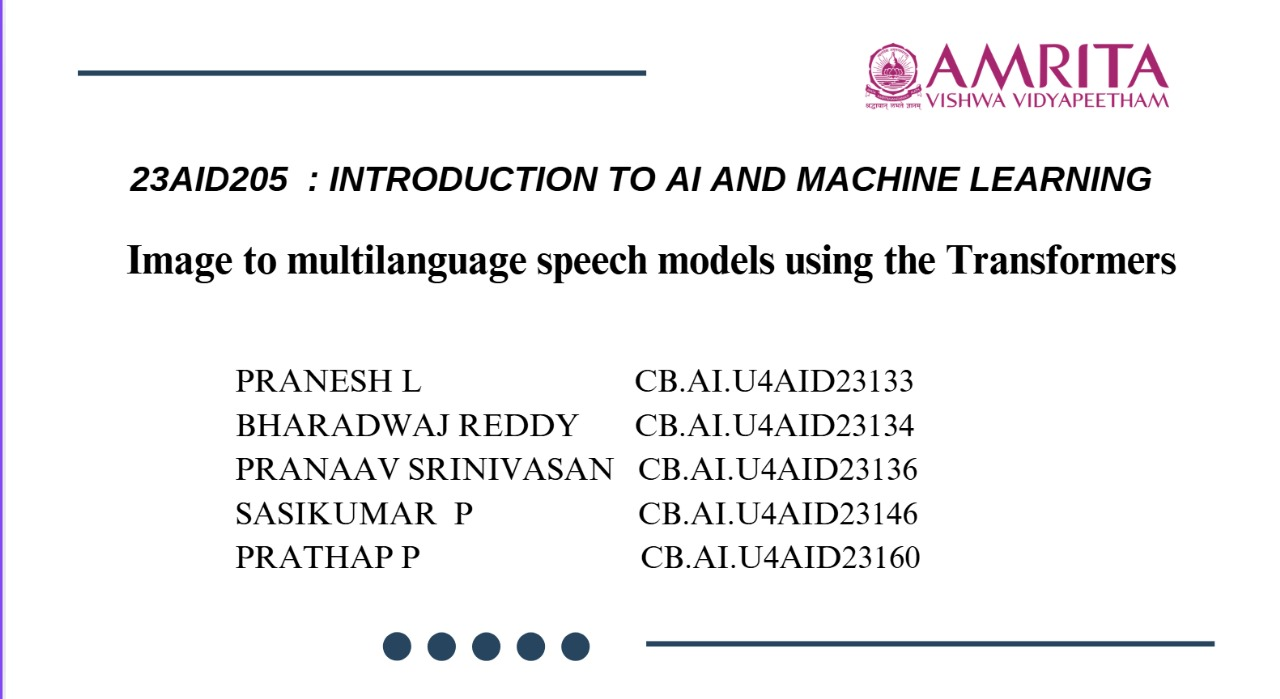

AMRITA squren WISHWA VIDYAPEETHAM 23AID205 INTRODUCTION Al MACHINE LEARNING Image multilanguage speech models using Transformers PRANESH L CBAIU4A1D23133 BHARADWAJ REDDY _ CBAIU4AID23134 PRANAAV SRINIVASAN CBAIU4AID23136 SASIKUMAR P CBAIU4AID23146 PRATHAP P CBAIU4AID23160 eeee8
Enter the target language code (e.g., 'en' for English): ta
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3443d81a194c8eec09.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
# Install Tesseract
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install pillow
!pip install nltk

# Import necessary libraries
from PIL import Image
import pytesseract
import re
import nltk
from nltk.corpus import stopwords
from google.colab import files
from IPython.display import display

# Specify the path to Tesseract (required in Colab)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Download NLTK data files (including punkt_tab)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Adding punkt_tab to avoid LookupError

def perform_ocr(image, psm=6, oem=3):

    # Configure OCR with specified PSM and OEM modes
    custom_config = f'--oem {oem} --psm {psm}'
    raw_text = pytesseract.image_to_string(image, config=custom_config)

    # Refine text using NLP processing
    cleaned_text = clean_text(raw_text)

    return cleaned_text

def clean_text(text):

    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a string
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

# Prompt user to upload an image
print("Please upload an image for OCR processing.")
uploaded = files.upload()

# Process the uploaded image
for image_name in uploaded.keys():
    # Open the uploaded image file
    image = Image.open(image_name)
    display(image)  # Display the image in the notebook

    # Perform OCR and print the extracted text
    extracted_text = perform_ocr(image, psm=6, oem=3)
    print(extracted_text)
    multilingual_tts_runtime(extracted_text)
